<a href="https://colab.research.google.com/github/m-atique/deeplearning-assignment/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import glob
from PIL import Image
from matplotlib import image
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers,utils

In [57]:
images =[]
labels=[]
types = []

my_path = "/content/drive/MyDrive/ml data/flowers/"
catg = glob.glob(my_path+'/*',recursive = True)
for dir in catg:
  types.append(dir.split(sep='/')[-1])
print(types)
files = glob.glob(my_path + '/**/*.jpg', recursive=True)
for i in files:
  labels.append(i.split(sep='/')[-2])
  img=Image.open(i)
  img =img.convert('L')   # Convert image to gray scale
  img =img.resize((100,100))
  img_ar = np.array(img)
  images.append(img_ar)
  

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


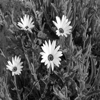

In [61]:
a= images[20]
b = Image.fromarray(a)
b  # gray scale image of 100 x 100

In [65]:
img_data = np.asarray(images)


(4323, 100, 100)

In [67]:
labels= np.asarray(labels)

In [68]:
labels.shape

(4323,)

In [69]:
train_data = img_data[:2594]
train_labels = labels[:2594]
#--------------------------------------
test_data =img_data[2594:]
test_labels= labels[2594:]

In [76]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

ValueError: ignored